In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

import random
import matplotlib.ticker as mtick


In [25]:
name = "_cs_00"
cocco1 = pd.read_csv(f"C:\\Users\\crino\\Desktop\\Thesis_ISI\\Simulations\\data_simulation\\datafile{name}.csv")
cocco = cocco1.T
print(cocco)
mediacocca = cocco.mean() / 100000
print(mediacocca)

      0     1     2     3     4     5     6     7      8      9     ...  \
x1     0.0   7.0  21.0  34.0  51.0  61.0  74.0  84.0  100.0  107.0  ...   
x2     0.0  10.0  24.0  35.0  43.0  48.0  56.0  65.0   76.0   86.0  ...   
x3     0.0   7.0  16.0  25.0  32.0  50.0  60.0  72.0   89.0  103.0  ...   
x4     0.0   9.0  16.0  29.0  38.0  55.0  61.0  76.0   86.0   97.0  ...   
x5     0.0  13.0  32.0  43.0  50.0  57.0  68.0  84.0   96.0  106.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...    ...    ...  ...   
x96    0.0  10.0  16.0  25.0  36.0  51.0  58.0  69.0   79.0   87.0  ...   
x97    0.0  15.0  29.0  43.0  50.0  62.0  75.0  88.0   98.0  104.0  ...   
x98    0.0  14.0  20.0  31.0  39.0  49.0  60.0  71.0   81.0   89.0  ...   
x99    0.0  18.0  26.0  38.0  48.0  58.0  67.0  75.0   90.0   97.0  ...   
x100   0.0   9.0  19.0  26.0  35.0  42.0  54.0  64.0   74.0   86.0  ...   

         992      993      994      995      996      997      998      999   \
x1    58161.0  5816

In [26]:
class datoni:
    
    def __init__(self, name):
        
        self.file_name = f"{name}"
        #self.file_path =f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\datafile{file_name}.csv"
        self.file_path = f"C:\\Users\\crino\\Desktop\\Thesis_ISI\\Simulations\\data_simulation\\datafile{name}.csv"
        self.datuni = pd.read_csv(self.file_path).T
        self.timesteps = range(len(self.datuni.columns))
        
    def media(self):
        #qua devo fare la media
        media = self.datuni.mean() / 100000
        return media
    
class plottoni:
    
    def __init__(self, pname, color, linewidth = None, linestyle = None, label = None):
        self.pname = f"{pname}"
        self.color = f"{color}"
        self.pfile_name = f"{pname}"[2:]
        self.pfile_path =f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\param_{self.pfile_name}.csv" 
        self.params = pd.read_csv(self.pfile_path)
        self.lbel = label
        self.labs = None
        if self.lbel == "mask":
            self.labs = self.params["r_s"][0]
        if self.lbel == "vax":
            self.labs = self.params["f_u"][0]
        self.linewidth = linewidth
        self.linestyle = linestyle
        self.datoni = datoni(name = self.pname)
    
    def plotto(self, *axs):

        
        axs[0].plot(self.datoni.timesteps, self.datoni.media(), color=self.color, alpha=0.7, label=f"${self.lbel} = {self.labs}$", linestyle = self.linestyle, linewidth = self.linewidth)
        #axs[0].vlines(self.datoni.thresh, ymin = 0, ymax = 0.7,  colors = self.color, linestyle = "-.")
        lower_bound, upper_bound = np.percentile(self.datoni.datuni/100000, [2.5, 97.5], axis = 0)
        axs[0].fill_between(x=self.datoni.timesteps, y1=lower_bound, y2=upper_bound, color=self.color, alpha =0.2, linewidth =0)
        
        axs[0].set_xlabel("$timesteps$")
        axs[0].set_ylabel("$r_{t}$")
        
        for ax in axs:
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.grid(axis="both", linestyle="--", linewidth=0.3)
        

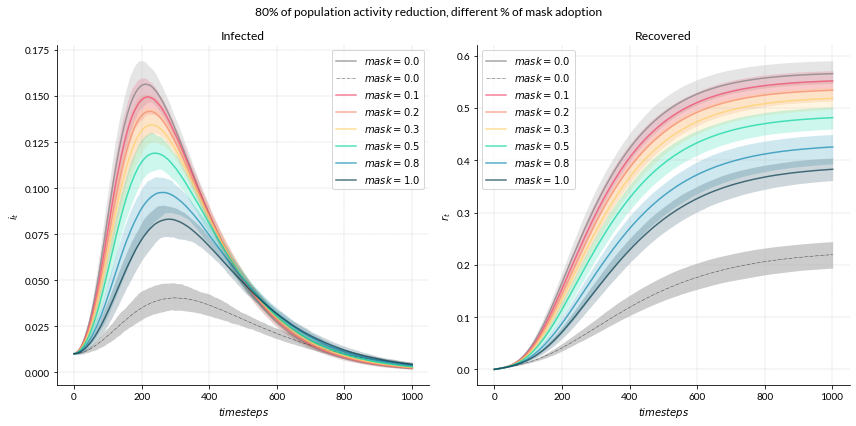

In [27]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

rows = 6
cols = 2
caso_zero_i = plottoni(pname = f"_i_cs_00", color = "grey",label = "mask")
caso_zero_i.plotto(axs[0])
caso_zero_r = plottoni(pname = f"_r_cs_00", color = "grey",label = "mask")
caso_zero_r.plotto(axs[1])
caso_rnd_i = plottoni(pname=f"_i_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
caso_rnd_r = plottoni(pname=f"_r_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
caso_rnd_r.plotto(axs[1])
caso_rnd_i.plotto(axs[0])
# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#f78c6b","#ffd166", "#06d6a0", "#118ab2","#073b4c"]
fs = ["10", "20", "30", "50","80", "tot"]
# Create instances of datoni for each element in the matrix
for i in range(rows):
   
    # Create an instance of datoni and store it in the matrix
        
    pmatrix[i][0] = plottoni(pname = f"_i_cs_mask_{fs[i]}", color = colori[i],label = "mask")
    pmatrix[i][0].plotto(axs[0])
    pmatrix[i][1] = plottoni(pname = f"_r_cs_mask_{fs[i]}", color = colori[i],label = "mask")
    pmatrix[i][1].plotto(axs[1])
    axs[0].set_ylabel("$i_{t}$")
for ax in axs:
    ax.grid(True)
    ax.legend()
axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper left")
axs[0].set_title("Infected")
axs[1].set_title("Recovered")


fig.suptitle("80% of population activity reduction, different % of mask adoption")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_mask_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

    
plt.tight_layout()
plt.show()

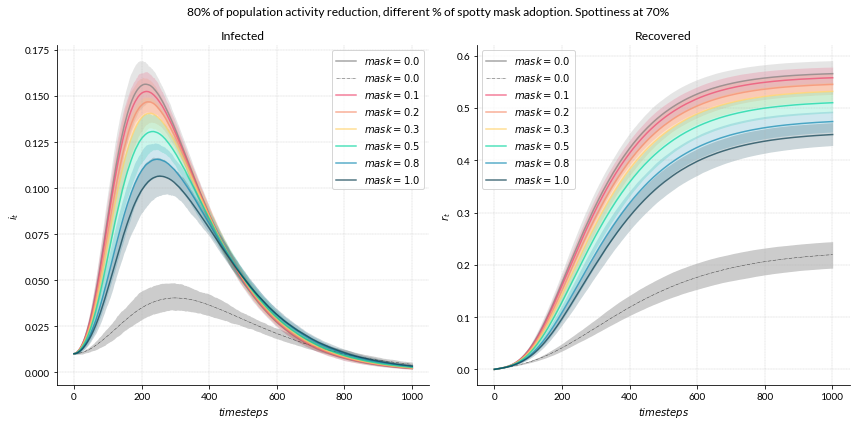

In [28]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

rows = 6
cols = 2
caso_zero_i = plottoni(pname = f"_i_cs_00", color = "grey",label = "mask")
caso_zero_i.plotto(axs[0])
caso_zero_r = plottoni(pname = f"_r_cs_00", color = "grey",label = "mask")
caso_zero_r.plotto(axs[1])
caso_rnd_i = plottoni(pname=f"_i_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.",label = "mask")
caso_rnd_r = plottoni(pname=f"_r_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.",label = "mask")
caso_rnd_r.plotto(axs[1])
caso_rnd_i.plotto(axs[0])
# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#f78c6b","#ffd166", "#06d6a0", "#118ab2","#073b4c"]
fs = ["10", "20", "30", "50","80", "tot"]
# Create instances of datoni for each element in the matrix
for i in range(rows):
   
    # Create an instance of datoni and store it in the matrix
        
    pmatrix[i][0] = plottoni(pname = f"_i_cs_spotty_{fs[i]}", color = colori[i],label = "mask")
    pmatrix[i][0].plotto(axs[0])
    pmatrix[i][1] = plottoni(pname = f"_r_cs_spotty_{fs[i]}", color = colori[i],label = "mask")
    pmatrix[i][1].plotto(axs[1])
    axs[0].set_ylabel("$i_{t}$")
for ax in axs:
    ax.grid(True)
    ax.legend()
axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper left")
axs[0].set_title("Infected")
axs[1].set_title("Recovered")


fig.suptitle("80% of population activity reduction, different % of spotty mask adoption. Spottiness at 70%")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_spotty_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

    
plt.tight_layout()
plt.show()

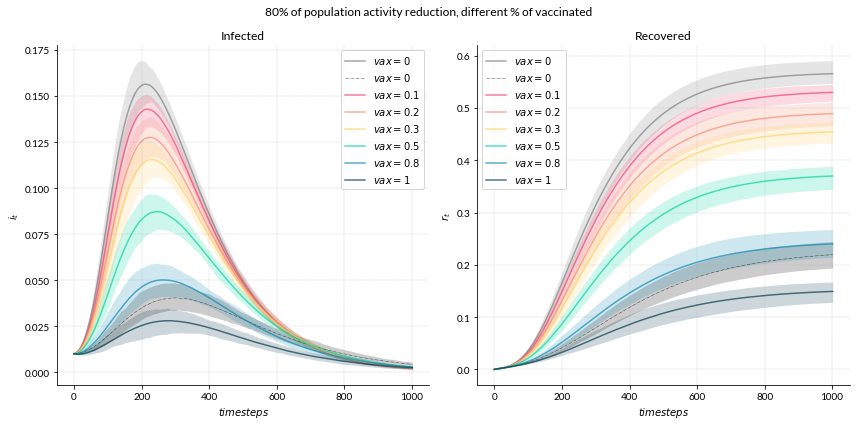

In [29]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

rows = 6
cols = 2
caso_zero_i = plottoni(pname = f"_i_cs_00", color = "grey", label = "vax")
caso_zero_i.plotto(axs[0])
caso_zero_r = plottoni(pname = f"_r_cs_00", color = "grey", label = "vax")
caso_zero_r.plotto(axs[1])
caso_rnd_i = plottoni(pname=f"_i_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "vax")
caso_rnd_r = plottoni(pname=f"_r_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "vax")
caso_rnd_r.plotto(axs[1])
caso_rnd_i.plotto(axs[0])
# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#f78c6b","#ffd166", "#06d6a0", "#118ab2","#073b4c"]
fs = ["10", "20", "30", "50","80", "tot"]
# Create instances of datoni for each element in the matrix
for i in range(rows):
   
    # Create an instance of datoni and store it in the matrix
        
    pmatrix[i][0] = plottoni(pname = f"_i_cs_vax_{fs[i]}", color = colori[i], label = "vax")
    pmatrix[i][0].plotto(axs[0])
    pmatrix[i][1] = plottoni(pname = f"_r_cs_vax_{fs[i]}", color = colori[i], label = "vax")
    pmatrix[i][1].plotto(axs[1])
    
    axs[0].set_ylabel("$i_{t}$")
for ax in axs:
    ax.grid(True)
    ax.legend()
axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper left")
axs[0].set_title("Infected")
axs[1].set_title("Recovered")


fig.suptitle("80% of population activity reduction, different % of vaccinated")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_vax_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

    
plt.tight_layout()
plt.show()

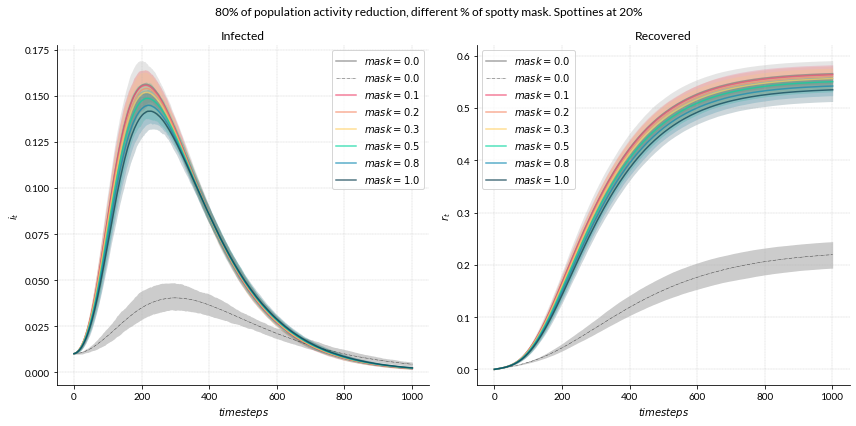

In [30]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

rows = 6
cols = 2
caso_zero_i = plottoni(pname = f"_i_cs_00", color = "grey", label = "mask")
caso_zero_i.plotto(axs[0])
caso_zero_r = plottoni(pname = f"_r_cs_00", color = "grey", label = "mask")
caso_zero_r.plotto(axs[1])
caso_rnd_i = plottoni(pname=f"_i_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
caso_rnd_r = plottoni(pname=f"_r_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
caso_rnd_r.plotto(axs[1])
caso_rnd_i.plotto(axs[0])
# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#f78c6b","#ffd166", "#06d6a0", "#118ab2","#073b4c"]
fs = ["10", "20", "30", "50","80", "tot"]
# Create instances of datoni for each element in the matrix
for i in range(rows):
   
    # Create an instance of datoni and store it in the matrix
        
    pmatrix[i][0] = plottoni(pname = f"_i_cs_spotty20_{fs[i]}", color = colori[i], label = "mask")
    pmatrix[i][0].plotto(axs[0])
    pmatrix[i][1] = plottoni(pname = f"_r_cs_spotty20_{fs[i]}", color = colori[i], label = "mask")
    pmatrix[i][1].plotto(axs[1])
    
    axs[0].set_ylabel("$i_{t}$")
for ax in axs:
    ax.grid(True)
    ax.legend()
axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper left")
axs[0].set_title("Infected")
axs[1].set_title("Recovered")


fig.suptitle("80% of population activity reduction, different % of spotty mask. Spottines at 20%")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_spotty20_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

    
plt.tight_layout()
plt.show()

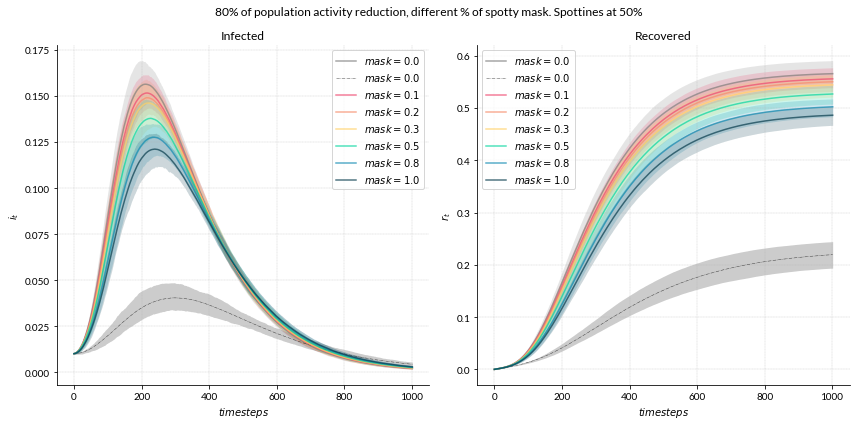

In [31]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

rows = 6
cols = 2
caso_zero_i = plottoni(pname = f"_i_cs_00", color = "grey", label = "mask")
caso_zero_i.plotto(axs[0])
caso_zero_r = plottoni(pname = f"_r_cs_00", color = "grey", label = "mask")
caso_zero_r.plotto(axs[1])
caso_rnd_i = plottoni(pname=f"_i_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
caso_rnd_r = plottoni(pname=f"_r_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
caso_rnd_r.plotto(axs[1])
caso_rnd_i.plotto(axs[0])
# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#f78c6b","#ffd166", "#06d6a0", "#118ab2","#073b4c"]
fs = ["10", "20", "30", "50","80", "tot"]
# Create instances of datoni for each element in the matrix
for i in range(rows):
   
    # Create an instance of datoni and store it in the matrix
        
    pmatrix[i][0] = plottoni(pname = f"_i_cs_spotty50_{fs[i]}", color = colori[i], label = "mask")
    pmatrix[i][0].plotto(axs[0])
    pmatrix[i][1] = plottoni(pname = f"_r_cs_spotty50_{fs[i]}", color = colori[i], label = "mask")
    pmatrix[i][1].plotto(axs[1])
    
    axs[0].set_ylabel("$i_{t}$")
for ax in axs:
    ax.grid(True)
    ax.legend()
axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper left")
axs[0].set_title("Infected")
axs[1].set_title("Recovered")


fig.suptitle("80% of population activity reduction, different % of spotty mask. Spottines at 50%")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_spotty50_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

    
plt.tight_layout()
plt.show()

In [32]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 6
cols = 100
fs = ["10", "20", "30", "50","80", "tot"]
tot_inf = np.zeros((rows, cols))
for i in range(rows):
    dfi = datoni(name = f"_i_cs_mask_{fs[i]}").datuni
    dfr = datoni(name = f"_r_cs_mask_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        tot_inf[i][j] = dfi.iloc[j, -1] + dfr.iloc[j,-1]
        
tot_inf_0 = np.zeros(cols)
dfi0 = datoni(name = f"_i_cs_00").datuni
dfr0 = datoni(name = f"_r_cs_00").datuni
for j in range(cols):
    tot_inf_0[j] = dfi0.iloc[j, -1] + dfr0.iloc[j,-1]
    #print(dfi.shape)
#print(tot_inf_0)

#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_m = np.zeros((rows, sam))
for i in range(rows):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf_0)
        dist_m[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_m)
if isinstance(dist_m, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")

[[-0.01493248 -0.04310284 -0.06784183 ... -0.04959911 -0.01807422
   0.01003131]
 [-0.06956041 -0.10109728 -0.00941883 ... -0.02999502 -0.06859929
  -0.05920045]
 [-0.05223006 -0.09986179 -0.08467614 ... -0.14714639 -0.06537747
  -0.05869196]
 [-0.14437943 -0.12543615 -0.13278455 ... -0.13453901 -0.16423848
  -0.12332498]
 [-0.24935791 -0.24143361 -0.2547497  ... -0.25865304 -0.2295542
  -0.22438091]
 [-0.35315359 -0.35256556 -0.33390278 ... -0.31358141 -0.33010925
  -0.32886955]]
The matrix is a NumPy array.


In [33]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 6
cols = 100
fs = ["10", "20", "30", "50","80", "tot"]
tot_inf = np.zeros((rows, cols))
for i in range(rows):
    dfi = datoni(name = f"_i_cs_vax_{fs[i]}").datuni
    dfr = datoni(name = f"_r_cs_vax_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        tot_inf[i][j] = dfi.iloc[j, -1] + dfr.iloc[j,-1]
        
tot_inf_0 = np.zeros(cols)
dfi0 = datoni(name = f"_i_cs_00").datuni
dfr0 = datoni(name = f"_r_cs_00").datuni
for j in range(cols):
    tot_inf_0[j] = dfi0.iloc[j, -1] + dfr0.iloc[j,-1]
    #print(dfi.shape)
#print(tot_inf_0)

#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_v = np.zeros((rows, sam))
for i in range(rows):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf_0)
        dist_v[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_v)
if isinstance(dist_v, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")

[[-0.02543428 -0.07964187 -0.04757748 ... -0.05399553 -0.01789615
  -0.06399832]
 [-0.11732172 -0.09761201 -0.12874103 ... -0.13227776 -0.14948154
  -0.1363236 ]
 [-0.18035778 -0.21798248 -0.18483726 ... -0.19931277 -0.19982016
  -0.18343852]
 [-0.34734918 -0.32166418 -0.33197644 ... -0.36137963 -0.32852219
  -0.32276912]
 [-0.55521277 -0.53345921 -0.58421127 ... -0.59801834 -0.60661652
  -0.59914927]
 [-0.70851629 -0.72783548 -0.738506   ... -0.71670209 -0.76620842
  -0.75912612]]
The matrix is a NumPy array.


In [34]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 6
cols = 100
fs = ["10", "20", "30", "50","80", "tot"]
tot_inf = np.zeros((rows, cols))
for i in range(rows):
    dfi = datoni(name = f"_i_cs_spotty_{fs[i]}").datuni
    dfr = datoni(name = f"_r_cs_spotty_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        tot_inf[i][j] = dfi.iloc[j, -1] + dfr.iloc[j,-1]
        
tot_inf_0 = np.zeros(cols)
dfi0 = datoni(name = f"_i_cs_00").datuni
dfr0 = datoni(name = f"_r_cs_00").datuni
for j in range(cols):
    tot_inf_0[j] = dfi0.iloc[j, -1] + dfr0.iloc[j,-1]
    #print(dfi.shape)
#print(tot_inf_0)

#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_s = np.zeros((rows, sam))
for i in range(rows):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf_0)
        dist_s[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_m)
if isinstance(dist_s, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")

[[-0.01493248 -0.04310284 -0.06784183 ... -0.04959911 -0.01807422
   0.01003131]
 [-0.06956041 -0.10109728 -0.00941883 ... -0.02999502 -0.06859929
  -0.05920045]
 [-0.05223006 -0.09986179 -0.08467614 ... -0.14714639 -0.06537747
  -0.05869196]
 [-0.14437943 -0.12543615 -0.13278455 ... -0.13453901 -0.16423848
  -0.12332498]
 [-0.24935791 -0.24143361 -0.2547497  ... -0.25865304 -0.2295542
  -0.22438091]
 [-0.35315359 -0.35256556 -0.33390278 ... -0.31358141 -0.33010925
  -0.32886955]]
The matrix is a NumPy array.


In [35]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 6
cols = 100
fs = ["10", "20", "30", "50","80", "tot"]
tot_inf = np.zeros((rows, cols))
for i in range(rows):
    dfi = datoni(name = f"_i_cs_spotty20_{fs[i]}").datuni
    dfr = datoni(name = f"_r_cs_spotty20_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        tot_inf[i][j] = dfi.iloc[j, -1] + dfr.iloc[j,-1]
        
tot_inf_0 = np.zeros(cols)
dfi0 = datoni(name = f"_i_cs_00").datuni
dfr0 = datoni(name = f"_r_cs_00").datuni
for j in range(cols):
    tot_inf_0[j] = dfi0.iloc[j, -1] + dfr0.iloc[j,-1]
    #print(dfi.shape)
#print(tot_inf_0)

#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_s2 = np.zeros((rows, sam))
for i in range(rows):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf_0)
        dist_s2[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_s2)
if isinstance(dist_s, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")

[[-0.01472479  0.04508408  0.04068093 ...  0.01072946  0.00160482
   0.01098195]
 [-0.02223824 -0.00765868 -0.02393222 ... -0.06286977 -0.00071766
   0.04267908]
 [-0.03469093 -0.02098678 -0.01871498 ... -0.04788767 -0.07905587
   0.01187666]
 [ 0.02487508 -0.00298782 -0.00043276 ... -0.05269285 -0.02540263
  -0.03627202]
 [-0.02415442 -0.02287907 -0.072352   ... -0.0432488  -0.05310808
  -0.03621014]
 [-0.04521821 -0.08419467 -0.03935683 ... -0.02302695 -0.08679066
  -0.02594211]]
The matrix is a NumPy array.


In [36]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 6
cols = 100
fs = ["10", "20", "30", "50","80", "tot"]
tot_inf = np.zeros((rows, cols))
for i in range(rows):
    dfi = datoni(name = f"_i_cs_spotty50_{fs[i]}").datuni
    dfr = datoni(name = f"_r_cs_spotty50_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        tot_inf[i][j] = dfi.iloc[j, -1] + dfr.iloc[j,-1]
        
tot_inf_0 = np.zeros(cols)
dfi0 = datoni(name = f"_i_cs_00").datuni
dfr0 = datoni(name = f"_r_cs_00").datuni
for j in range(cols):
    tot_inf_0[j] = dfi0.iloc[j, -1] + dfr0.iloc[j,-1]
    #print(dfi.shape)
#print(tot_inf_0)

#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_t = np.zeros((rows, sam))
for i in range(rows):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf_0)
        dist_t[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_m)
if isinstance(dist_s, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")

[[-0.01493248 -0.04310284 -0.06784183 ... -0.04959911 -0.01807422
   0.01003131]
 [-0.06956041 -0.10109728 -0.00941883 ... -0.02999502 -0.06859929
  -0.05920045]
 [-0.05223006 -0.09986179 -0.08467614 ... -0.14714639 -0.06537747
  -0.05869196]
 [-0.14437943 -0.12543615 -0.13278455 ... -0.13453901 -0.16423848
  -0.12332498]
 [-0.24935791 -0.24143361 -0.2547497  ... -0.25865304 -0.2295542
  -0.22438091]
 [-0.35315359 -0.35256556 -0.33390278 ... -0.31358141 -0.33010925
  -0.32886955]]
The matrix is a NumPy array.


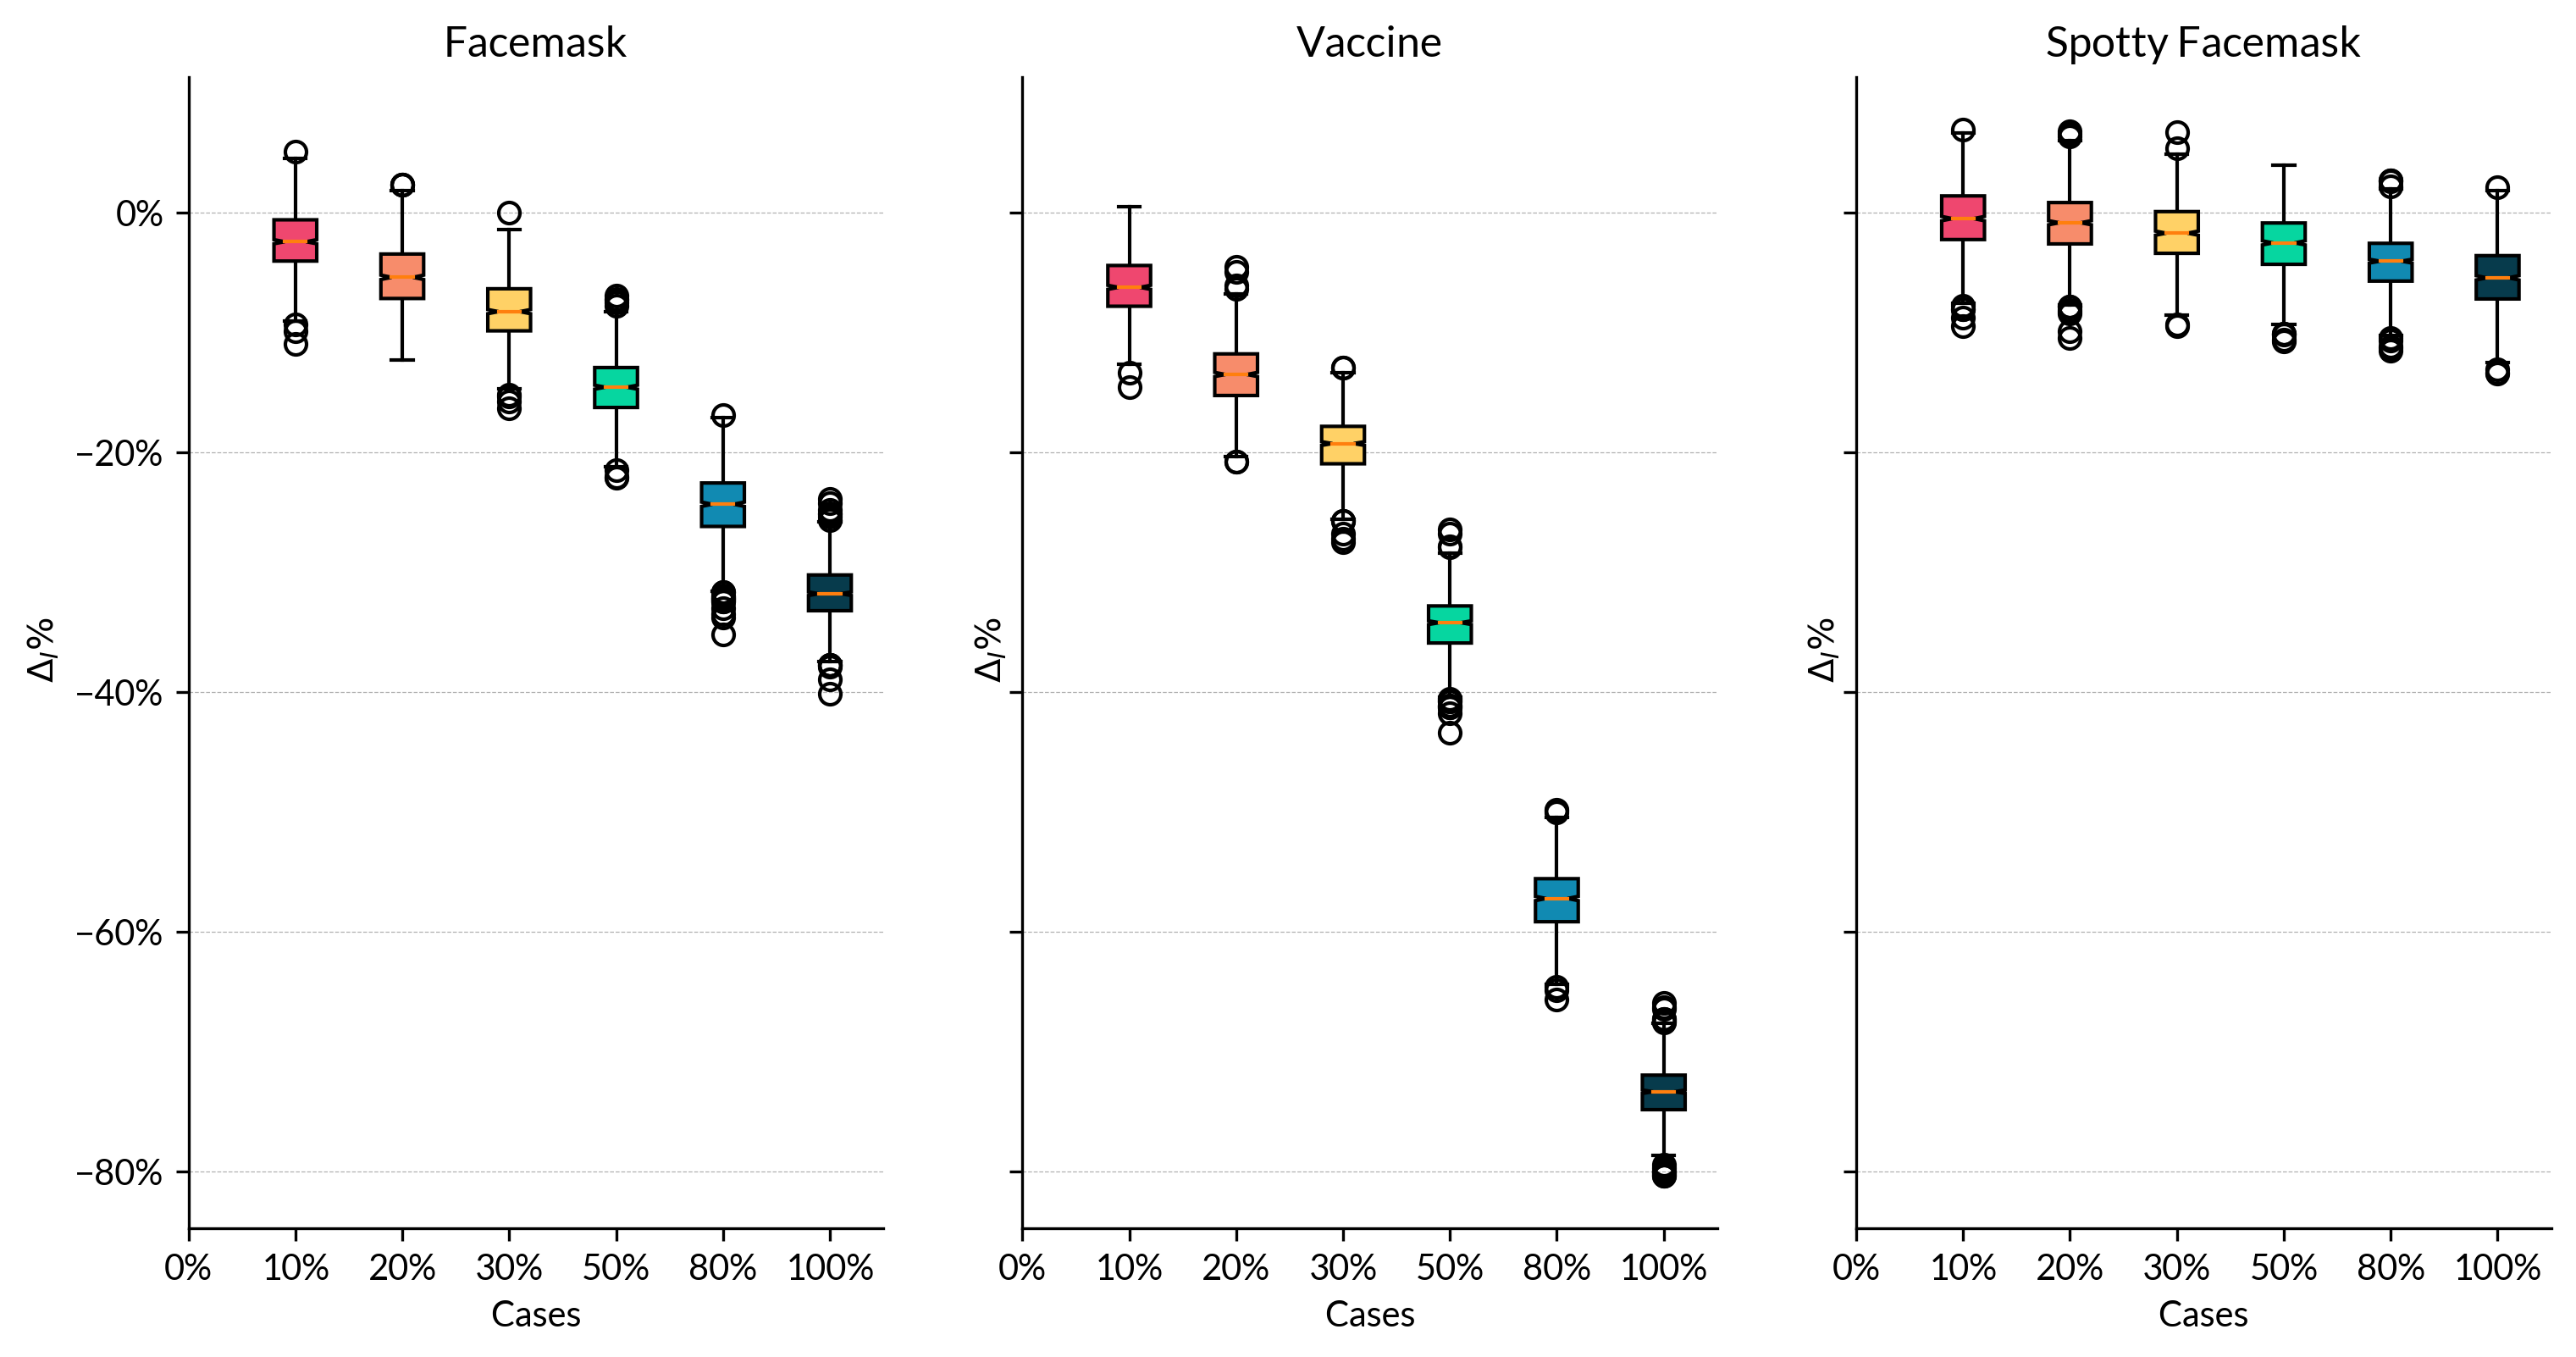

In [37]:
fig, axs = plt.subplots(ncols=3, sharey=True, dpi=300, figsize=(12,6))

custom_labels = ["0%", "10%", "20%", "30%", "50%", "80%", "100%"]
#colori = [(239, 71, 111,1), (247, 140, 107,1) ,(255, 209, 102,1),(6, 214, 160,1), (17, 138, 178,1),(7, 59, 76,1)]
colori =  [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1), (7/255, 59/255, 76/255, 1)]
boxplot1 = axs[0].boxplot(np.transpose(dist_m)*100,notch =  True,patch_artist=True, widths= 0.4);
for patch, color in zip(boxplot1['boxes'], colori):
        patch.set_facecolor(color)

boxplot2 = axs[1].boxplot(np.transpose(dist_v*100),notch =  True,patch_artist=True, widths= 0.4);
for patch, color in zip(boxplot2['boxes'], colori):
        patch.set_facecolor(color)

boxplot3 = axs[2].boxplot(np.transpose(dist_s2)*100,notch =  True,patch_artist=True, widths= 0.4);
for patch, color in zip(boxplot3['boxes'], colori):
        patch.set_facecolor(color)
        
for ax in axs :
    #ax.set_xticklabels(custom_labels);
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(axis="y", linestyle="--", linewidth=0.3)
    ax.yaxis.grid(True)
    ax.set_xlabel('Cases')
    ax.set_ylabel(' $\Delta_I \%$')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xticks(np.arange(len(custom_labels)))
    ax.set_xticklabels(custom_labels)
axs[0].set_title("Facemask")    
axs[1].set_title("Vaccine")    
axs[2].set_title("Spotty Facemask")
    
plt.show()


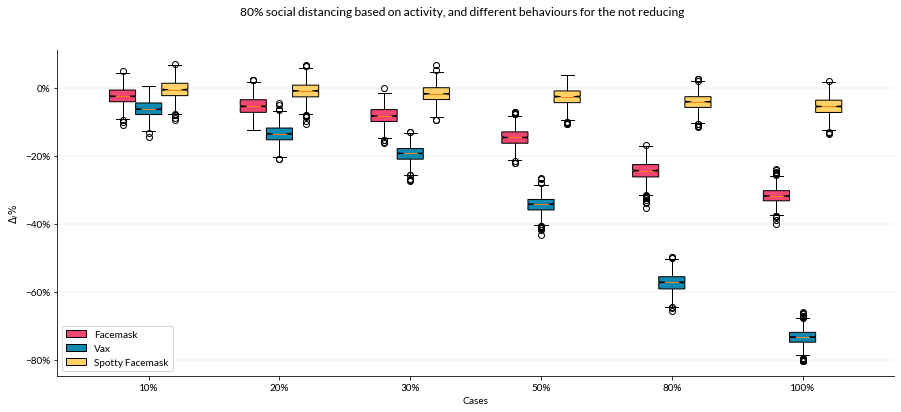

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["10%", "20%", "30%", "50%", "80%", "100%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1), (7/255, 59/255, 76/255, 1)]

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.2
positions_v = np.array(range(len(custom_labels))) 
positions_s = np.array(range(len(custom_labels))) +0.2

#for i in range(len(custom_labels)):
 #   ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
  #  ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
   # ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_m)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(colori[0])

boxplot2 = ax.boxplot(np.transpose(dist_v)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(colori[4])
    
boxplot3 = ax.boxplot(np.transpose(dist_s2)*100, positions = positions_s, notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(colori[2])

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Cases')
ax.set_ylabel('$\Delta_I\%$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

fig.suptitle('80% social distancing based on activity, and different behaviours for the not reducing')

# Add legend
ax.legend([boxplot1["boxes"][0], boxplot2["boxes"][4], boxplot3["boxes"][2]], ['Facemask', 'Vax', "Spotty Facemask"])

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_deltai_fmvs_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

plt.show()


In [39]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 6
cols = 100
fs = ["10", "20", "30", "50","80", "tot"]
max_inf = np.zeros((rows, cols))
for i in range(rows):
    dfi_t = datoni(name = f"_i_cs_mask_{fs[i]}").datuni
    dfi = dfi_t.transpose()
    dfr = datoni(name = f"_r_cs_mask_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        max_inf[i][j] =max(dfi.iloc[:, j])
        
max_inf_0 = np.zeros(cols)
dfi0_t = datoni(name = f"_i_cs_00").datuni
dfi_0 = dfi0_t.transpose()
dfr0 = datoni(name = f"_r_cs_00").datuni
for j in range(cols):
    max_inf_0[j] = max(dfi_0.iloc[:, j])
    #print(dfi.shape)
#print(tot_inf_0)

#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_m_m = np.zeros((rows, sam))
for i in range(rows):
    for j in range(sam):
        max_pick = random.choice(max_inf[i])  
        max_pick_0 = random.choice(max_inf_0)
        dist_m_m[i][j] = (max_pick -max_pick_0)/max_pick_0
print(dist_m_m)
if isinstance(dist_m_m, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")

[[-2.72306675e-02 -6.68167203e-02 -4.47046646e-02 ... -1.30710660e-01
  -1.33601087e-01  4.49669172e-04]
 [-5.07726269e-02 -7.94119577e-02 -1.61774260e-01 ... -5.81870959e-02
  -9.03230008e-02 -1.13376117e-01]
 [-7.46614273e-02 -1.84192266e-01 -1.07970826e-01 ... -1.20189193e-01
  -1.98419505e-01 -1.81733167e-01]
 [-2.88364761e-01 -2.07252876e-01 -1.74834437e-01 ... -1.54846973e-01
  -2.63167807e-01 -3.04265761e-01]
 [-3.83667971e-01 -3.64625940e-01 -3.74266840e-01 ... -3.96207268e-01
  -4.00544117e-01 -3.48109923e-01]
 [-4.79888961e-01 -5.03646338e-01 -4.47454580e-01 ... -4.07509775e-01
  -4.60019622e-01 -4.57759559e-01]]
The matrix is a NumPy array.


In [40]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 6
cols = 100
fs = ["10", "20", "30", "50","80", "tot"]
tot_inf = np.zeros((rows, cols))
for i in range(rows):
    dfi_t = datoni(name = f"_i_cs_vax_{fs[i]}").datuni
    dfi = dfi_t.transpose()
    dfr = datoni(name = f"_r_cs_vax_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    for j in range(cols):
        tot_inf[i][j] = max(dfi.iloc[:, j])
        
tot_inf_0 = np.zeros(cols)
dfi0_t = datoni(name = f"_i_cs_00").datuni
dfi_0 = dfi0_t.transpose()
dfr0 = datoni(name = f"_r_cs_00").datuni
for j in range(cols):
    tot_inf_0[j] = max(dfi_0.iloc[:, j])
    #print(dfi.shape)
#print(tot_inf_0)

#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_v = np.zeros((rows, sam))
for i in range(rows):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf_0)
        dist_v[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_v)
if isinstance(dist_v, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")

[[-0.01581236 -0.09615985 -0.03502639 ... -0.07000831 -0.02123965
  -0.04430006]
 [-0.24600062 -0.14105549 -0.21047107 ... -0.25644897 -0.18335328
  -0.21873638]
 [-0.33739966 -0.19192926 -0.21065872 ... -0.26856938 -0.31831003
  -0.28534428]
 [-0.44380024 -0.43888592 -0.39652853 ... -0.41473921 -0.43387937
  -0.4048762 ]
 [-0.71934829 -0.6751486  -0.63364426 ... -0.71495473 -0.64644526
  -0.66043001]
 [-0.75310677 -0.80733642 -0.77940293 ... -0.81685919 -0.83581589
  -0.78341749]]
The matrix is a NumPy array.


In [41]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 6
cols = 100
fs = ["10", "20", "30", "50","80", "tot"]
tot_inf = np.zeros((rows, cols))
for i in range(rows):
    dfi_t = datoni(name = f"_i_cs_spotty_{fs[i]}").datuni
    dfi = dfi_t.transpose()
    #print(dfi)
    dfr = datoni(name = f"_r_cs_spotty_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    #dfi_numeric = pd.to_numeric(dfi, errors='coerce')
    
    # Drop NaN values
    #dfi_numeric = dfi_numeric.dropna()
    
    # Calculate maximum value along the columns
    #max_value = dfi_numeric.max(axis=0)
    for j in range(cols):
        tot_inf[i][j] = max(dfi.iloc[:, j])
print("a")
print(tot_inf)
tot_inf_0 = np.zeros(cols)
dfi0_t = datoni(name = f"_i_cs_00").datuni
dfi_0 = dfi0_t.transpose()
dfr0 = datoni(name = f"_r_cs_00").datuni
print("b")
print(dfi_0)
for j in range(cols):
    tot_inf_0[j] = max(dfi_0.iloc[:, j])
    #print(tot_inf_0[j])
#print(tot_inf_0)
#print("c")
#print(tot_inf_0)
#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_s_m = np.zeros((rows, sam))
for i in range(rows):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf_0)
        dist_s_m[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_s_m)
if isinstance(dist_s, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")

a
[[15103. 15065. 15502. 15816. 15428. 15456. 15837. 15839. 15871. 15170.
  14834. 15117. 14846. 15952. 16453. 15037. 14848. 15136. 15553. 15614.
  15794. 14988. 15333. 15435. 14873. 16110. 15889. 13697. 15014. 15199.
  14515. 14948. 14854. 15495. 14843. 15280. 15665. 16101. 15064. 14732.
  15497. 16223. 14925. 15146. 14526. 15770. 14993. 15767. 15870. 14050.
  15594. 15955. 15901. 14286. 13587. 14928. 15055. 14997. 14668. 15233.
  14911. 14370. 15826. 15395. 15216. 14802. 16292. 15102. 15314. 15865.
  15699. 14749. 15131. 15209. 16357. 16408. 14409. 15141. 14737. 15821.
  15287. 16329. 14847. 15969. 14602. 14974. 15410. 14883. 16027. 15655.
  14896. 15505. 15923. 15607. 16005. 15597. 14849. 15670. 15617. 14984.]
 [16265. 14978. 15283. 14779. 14402. 14090. 14199. 14954. 13817. 14574.
  15359. 14329. 14338. 15170. 14492. 15773. 14809. 15088. 13959. 14695.
  15799. 13983. 15060. 14699. 14134. 15267. 14637. 14371. 14912. 15295.
  14519. 14474. 15554. 14941. 14834. 14173. 15497. 14502. 141

In [42]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 6
cols = 100
fs = ["10", "20", "30", "50","80", "tot"]
tot_inf = np.zeros((rows, cols))
for i in range(rows):
    dfi_t = datoni(name = f"_i_cs_spotty20_{fs[i]}").datuni
    dfi = dfi_t.transpose()
    #print(dfi)
    dfr = datoni(name = f"_r_cs_spotty20_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    #dfi_numeric = pd.to_numeric(dfi, errors='coerce')
    
    # Drop NaN values
    #dfi_numeric = dfi_numeric.dropna()
    
    # Calculate maximum value along the columns
    #max_value = dfi_numeric.max(axis=0)
    for j in range(cols):
        tot_inf[i][j] = max(dfi.iloc[:, j])
print("a")
print(tot_inf)
tot_inf_0 = np.zeros(cols)
dfi0_t = datoni(name = f"_i_cs_00").datuni
dfi_0 = dfi0_t.transpose()
dfr0 = datoni(name = f"_r_cs_00").datuni
print("b")
print(dfi_0)
for j in range(cols):
    tot_inf_0[j] = max(dfi_0.iloc[:, j])
    #print(tot_inf_0[j])
#print(tot_inf_0)
#print("c")
#print(tot_inf_0)
#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_s2_m = np.zeros((rows, sam))
for i in range(rows):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf_0)
        dist_s2_m[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_s2_m)
if isinstance(dist_s, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")

a
[[15611. 15250. 15886. 15623. 15810. 15523. 15142. 16074. 15347. 15139.
  16262. 16232. 16045. 16058. 15852. 16182. 14971. 15531. 14802. 14465.
  16214. 15476. 16282. 15578. 14706. 16386. 15469. 15550. 15862. 15940.
  16220. 16624. 15383. 15990. 15522. 14966. 15766. 14712. 15900. 15909.
  14579. 17294. 15265. 15022. 15688. 16432. 15560. 16206. 15676. 15885.
  16298. 15462. 15437. 15673. 15419. 15617. 14195. 15885. 15349. 15125.
  16043. 16221. 16227. 15594. 15286. 15981. 16034. 15579. 14888. 15992.
  15368. 16068. 15706. 14794. 15587. 15682. 15768. 15298. 15090. 15743.
  14790. 16236. 15406. 15039. 16207. 16386. 15928. 14956. 15580. 16233.
  15683. 16456. 15771. 15405. 15621. 15536. 15509. 15615. 15588. 14344.]
 [15686. 15853. 14903. 15792. 14845. 15194. 16420. 15276. 15105. 15449.
  15858. 15603. 15694. 16274. 15209. 16061. 15695. 15933. 15451. 15889.
  14788. 15678. 15772. 15274. 15284. 16052. 15522. 16155. 15838. 15063.
  14754. 15341. 15326. 16400. 15731. 14745. 15940. 15775. 151

In [43]:
#mi creo i vettori con gli infetti totali (una matrice e un vettore)
rows = 6
cols = 100
fs = ["10", "20", "30", "50","80", "tot"]
tot_inf = np.zeros((rows, cols))
for i in range(rows):
    dfi_t = datoni(name = f"_i_cs_spotty50_{fs[i]}").datuni
    dfi = dfi_t.transpose()
    #print(dfi)
    dfr = datoni(name = f"_r_cs_spotty50_{fs[i]}").datuni
    #print(dfi.shape)
    #print(dfr.shape)
    #dfi_numeric = pd.to_numeric(dfi, errors='coerce')
    
    # Drop NaN values
    #dfi_numeric = dfi_numeric.dropna()
    
    # Calculate maximum value along the columns
    #max_value = dfi_numeric.max(axis=0)
    for j in range(cols):
        tot_inf[i][j] = max(dfi.iloc[:, j])
print("a")
print(tot_inf)
tot_inf_0 = np.zeros(cols)
dfi0_t = datoni(name = f"_i_cs_00").datuni
dfi_0 = dfi0_t.transpose()
dfr0 = datoni(name = f"_r_cs_00").datuni
print("b")
print(dfi_0)
for j in range(cols):
    tot_inf_0[j] = max(dfi_0.iloc[:, j])
    #print(tot_inf_0[j])
#print(tot_inf_0)
#print("c")
#print(tot_inf_0)
#mi creo i 6 vettori che fanno le distribuzoini con i 1000 random pick
#print(tot_inf[0])
sam = 1000
dist_t_m = np.zeros((rows, sam))
for i in range(rows):
    for j in range(sam):
        r_pick = random.choice(tot_inf[i])  
        r_pick_0 = random.choice(tot_inf_0)
        dist_t_m[i][j] = (r_pick - r_pick_0)/r_pick_0
print(dist_t_m)
if isinstance(dist_s, np.ndarray):
    print("The matrix is a NumPy array.")
else:
    print("The matrix is not a NumPy array.")

a
[[15377. 14905. 14667. 14597. 15226. 15641. 15271. 14598. 15307. 14880.
  15649. 15754. 15157. 15543. 15859. 15501. 14848. 15397. 14581. 15414.
  15120. 15214. 14808. 14689. 14801. 15588. 14712. 15378. 15190. 15079.
  15458. 15363. 15104. 14808. 14497. 15139. 14261. 15069. 15161. 15468.
  15338. 14616. 14813. 16351. 14767. 14942. 15411. 15329. 15616. 15985.
  15907. 14809. 15051. 14575. 15368. 15788. 15783. 15059. 15109. 15147.
  14822. 14802. 14879. 14159. 14617. 15384. 15658. 15986. 15263. 16275.
  15093. 15345. 15694. 16300. 15410. 14565. 15770. 15151. 15301. 15702.
  14474. 15360. 15797. 15439. 15036. 15186. 14793. 15222. 14365. 15379.
  15323. 14520. 15772. 15805. 14878. 16132. 15902. 15349. 15422. 14759.]
 [14856. 15186. 14948. 13892. 14549. 14549. 14750. 15195. 14448. 15639.
  15737. 15888. 15314. 15699. 15660. 14292. 14957. 15318. 15306. 14652.
  14580. 14669. 15259. 14313. 14772. 14502. 15336. 14902. 14463. 15531.
  14535. 15315. 15052. 14568. 15546. 15797. 15405. 14800. 151

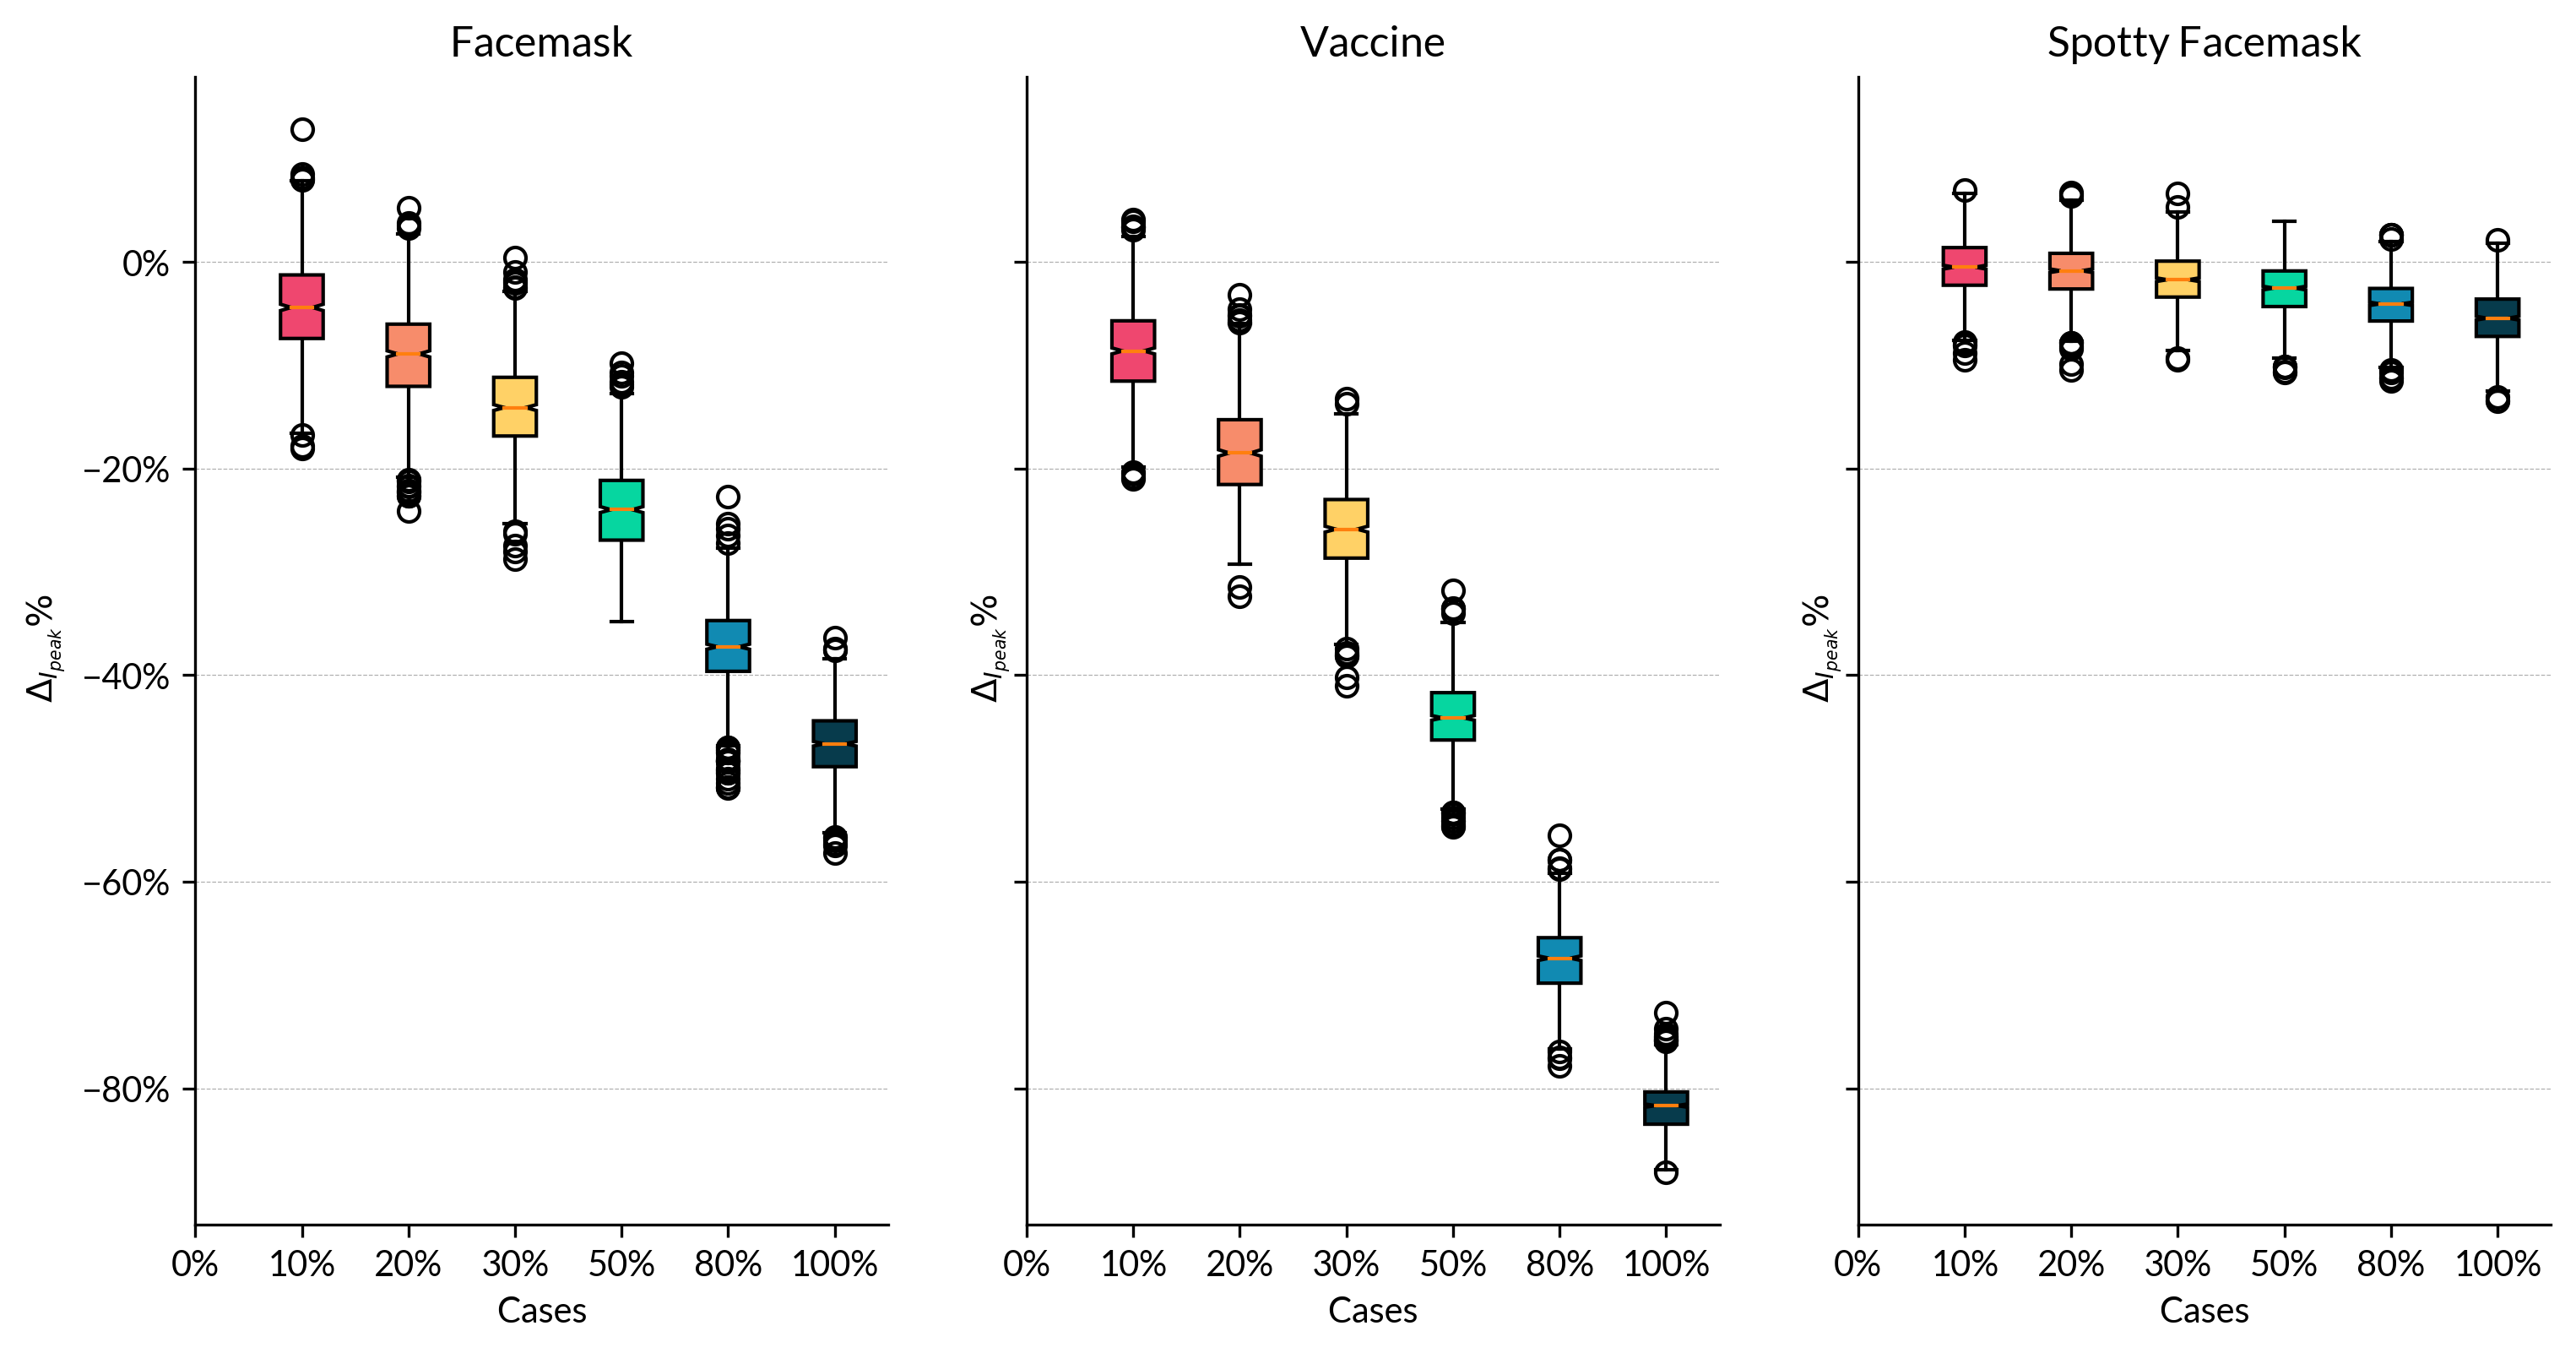

In [44]:
fig, axs = plt.subplots(ncols=3, sharey=True, dpi=300, figsize=(12,6))

custom_labels = ["0%", "10%", "20%", "30%", "50%", "80%", "100%"]
#colori = [(239, 71, 111,1), (247, 140, 107,1) ,(255, 209, 102,1),(6, 214, 160,1), (17, 138, 178,1),(7, 59, 76,1)]
colori =  [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1), (7/255, 59/255, 76/255, 1)]
boxplot1 = axs[0].boxplot(np.transpose(dist_m_m)*100,notch =  True,patch_artist=True, widths= 0.4);
for patch, color in zip(boxplot1['boxes'], colori):
        patch.set_facecolor(color)

boxplot2 = axs[1].boxplot(np.transpose(dist_v*100),notch =  True,patch_artist=True, widths= 0.4);
for patch, color in zip(boxplot2['boxes'], colori):
        patch.set_facecolor(color)

boxplot3 = axs[2].boxplot(np.transpose(dist_s2)*100,notch =  True,patch_artist=True, widths= 0.4);
for patch, color in zip(boxplot3['boxes'], colori):
        patch.set_facecolor(color)
        
for ax in axs :
    #ax.set_xticklabels(custom_labels);
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(axis="y", linestyle="--", linewidth=0.3)
    ax.yaxis.grid(True)
    ax.set_xlabel('Cases')
    ax.set_ylabel(' $\Delta_{I_{peak}} \%$')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xticks(np.arange(len(custom_labels)))
    ax.set_xticklabels(custom_labels)
axs[0].set_title("Facemask")    
axs[1].set_title("Vaccine")    
axs[2].set_title("Spotty Facemask")
    
plt.show()


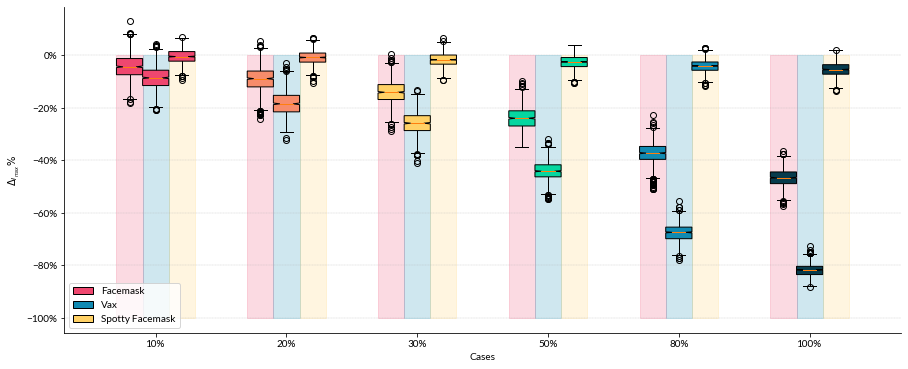

In [45]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["10%", "20%", "30%", "50%", "80%", "100%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1), (7/255, 59/255, 76/255, 1)]

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.2
positions_v = np.array(range(len(custom_labels))) 
positions_s = np.array(range(len(custom_labels))) +0.2

for i in range(len(custom_labels)):
    ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_m_m)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(color)

boxplot2 = ax.boxplot(np.transpose(dist_v)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(color)
    
boxplot3 = ax.boxplot(np.transpose(dist_s2)*100, positions = positions_s, notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(color)

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Cases')
ax.set_ylabel('$\Delta_{I_{max}}\%$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


# Add legend
ax.legend([boxplot1["boxes"][0], boxplot2["boxes"][4], boxplot3["boxes"][2]], ['Facemask', 'Vax', "Spotty Facemask"])

plt.show()


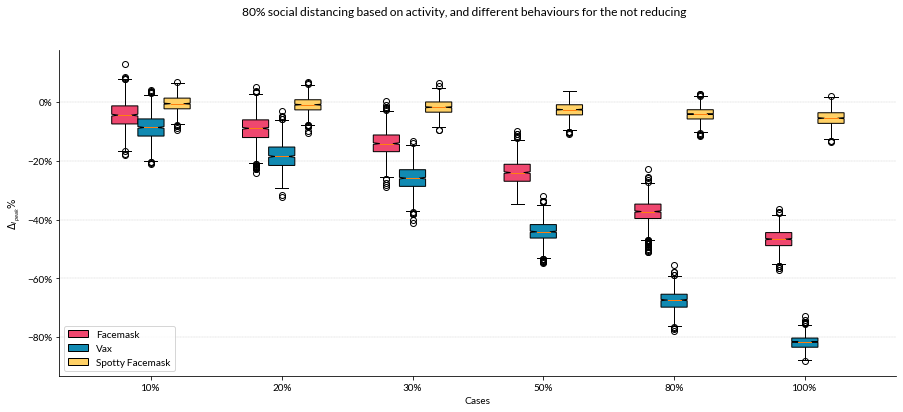

In [46]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["10%", "20%", "30%", "50%", "80%", "100%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1), (7/255, 59/255, 76/255, 1)]

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.2
positions_v = np.array(range(len(custom_labels))) 
positions_s = np.array(range(len(custom_labels))) +0.2

"""for i in range(len(custom_labels)):
    ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)
"""  
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_m_m)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(colori[0])

boxplot2 = ax.boxplot(np.transpose(dist_v)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(colori[4])
    
boxplot3 = ax.boxplot(np.transpose(dist_s2)*100, positions = positions_s, notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(colori[2])

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Cases')
ax.set_ylabel('$\Delta_{I_{peak}}\%$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

fig.suptitle('80% social distancing based on activity, and different behaviours for the not reducing')
# Add legend
ax.legend([boxplot1["boxes"][0], boxplot2["boxes"][4], boxplot3["boxes"][2]], ['Facemask', 'Vax', "Spotty Facemask"])

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_deltapeak_fmvs_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
plt.show()


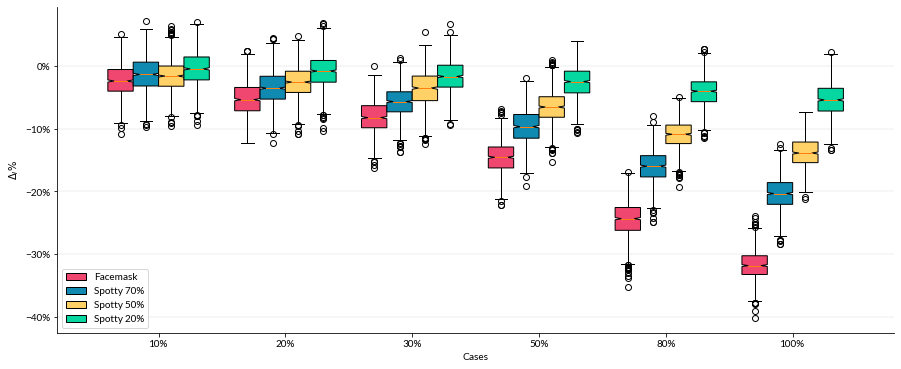

In [47]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["10%", "20%", "30%", "50%", "80%", "100%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1), (7/255, 59/255, 76/255, 1)]

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.3
positions_v = np.array(range(len(custom_labels))) -0.1
positions_t = np.array(range(len(custom_labels))) +0.1
positions_s = np.array(range(len(custom_labels))) +0.3

"""for i in range(len(custom_labels)):
    ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)
    """
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_m)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(colori[0])

boxplot2 = ax.boxplot(np.transpose(dist_s)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(colori[4])

boxplot4 = ax.boxplot(np.transpose(dist_t)*100, positions = positions_t, notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot4['boxes'], colori):
    patch.set_facecolor(colori[2])
    
boxplot3 = ax.boxplot(np.transpose(dist_s2)*100, positions = positions_s, notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(colori[3])

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Cases')
ax.set_ylabel('$\Delta_I\%$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


# Add legend
ax.legend([boxplot1["boxes"][0], boxplot2["boxes"][4], boxplot4["boxes"][2], boxplot3["boxes"][3]], ['Facemask', 'Spotty 70%', "Spotty 50%","Spotty 20%"])
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_deltai_spotty_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
plt.show()


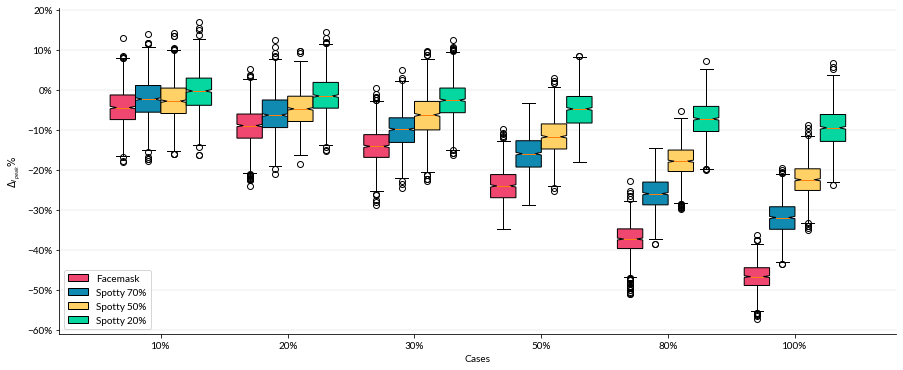

In [48]:
fig, ax = plt.subplots(figsize=(15, 6))

# Custom labels for x-axis ticks
custom_labels = ["10%", "20%", "30%", "50%", "80%", "100%"]

# Define colors for boxplots
colori = [(239/255, 71/255, 111/255, 1), (247/255, 140/255, 107/255, 1),
          (255/255, 209/255, 102/255, 1), (6/255, 214/255, 160/255, 1),
          (17/255, 138/255, 178/255, 1), (7/255, 59/255, 76/255, 1)]

# Positions for the boxplots
positions_m = np.array(range(len(custom_labels))) - 0.3
positions_v = np.array(range(len(custom_labels))) -0.1
positions_t = np.array(range(len(custom_labels))) +0.1
positions_s = np.array(range(len(custom_labels))) +0.3

"""for i in range(len(custom_labels)):
    ax.fill_between([positions_m[i] - 0.1, positions_m[i] + 0.1], -100, 0, color=colori[0], alpha = 0.2)
    ax.fill_between([positions_v[i] - 0.1, positions_v[i] + 0.1], -100, 0, color=colori[4], alpha = 0.2)
    ax.fill_between([positions_s[i] - 0.1, positions_s[i] + 0.1], -100, 0, color=colori[2], alpha = 0.2)
    """
# Plot the boxplots for dist_m and dist_v
boxplot1 = ax.boxplot(np.transpose(dist_m_m)*100, positions=positions_m, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot1['boxes'], colori):
    patch.set_facecolor(colori[0])

boxplot2 = ax.boxplot(np.transpose(dist_s_m)*100, positions=positions_v, notch=True, patch_artist=True, widths=0.2)
for patch, color in zip(boxplot2['boxes'], colori):
    patch.set_facecolor(colori[4])

boxplot4 = ax.boxplot(np.transpose(dist_t_m)*100, positions = positions_t, notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot4['boxes'], colori):
    patch.set_facecolor(colori[2])
    
boxplot3 = ax.boxplot(np.transpose(dist_s2_m)*100, positions = positions_s, notch =  True,patch_artist=True, widths= 0.2);
for patch, color in zip(boxplot3['boxes'], colori):
    patch.set_facecolor(colori[3])

# Customize the plot
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", linewidth=0.3)
ax.yaxis.grid(True)
ax.set_xlabel('Cases')
ax.set_ylabel('$\Delta_{I_{peak}}\%$')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


# Add legend
ax.legend([boxplot1["boxes"][0], boxplot2["boxes"][4], boxplot4["boxes"][2], boxplot3["boxes"][3]], ['Facemask', 'Spotty 70%', "Spotty 50%","Spotty 20%"])
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_deltapeak_spotty_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
plt.show()


In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

rows = 6
cols = 2
caso_zero_i = plottoni(pname = f"_i_cs_00", color = "grey",label = "mask")
caso_zero_i.plotto(axs[0])
caso_zero_r = plottoni(pname = f"_r_cs_00", color = "grey",label = "mask")
caso_zero_r.plotto(axs[1])
caso_rnd_i = plottoni(pname=f"_i_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
caso_rnd_r = plottoni(pname=f"_r_cs_rnd", color = "black", linewidth = "0.5", linestyle = "-.", label = "mask")
caso_rnd_r.plotto(axs[1])
caso_rnd_i.plotto(axs[0])
# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#f78c6b","#ffd166", "#06d6a0", "#118ab2","#073b4c"]
fs = ["10", "20", "30", "50","80", "tot"]
# Create instances of datoni for each element in the matrix
for i in range(rows):
   
    # Create an instance of datoni and store it in the matrix
        
    pmatrix[i][0] = plottoni(pname = f"_i_cs_mask_{fs[i]}", color = colori[i],label = "mask")
    pmatrix[i][0].plotto(axs[0])
    pmatrix[i][1] = plottoni(pname = f"_r_cs_mask_{fs[i]}", color = colori[i],label = "mask")
    pmatrix[i][1].plotto(axs[1])
    axs[0].set_ylabel("$i_{t}$")
for ax in axs:
    ax.grid(True)
    ax.legend()
axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper left")
axs[0].set_title("Infected")
axs[1].set_title("Recovered")


fig.suptitle("80% of population activity reduction, different % of mask adoption")

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\cs_mask_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

    
plt.tight_layout()
plt.show()